In [1]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *
from torch.utils.data import DataLoader

# <center>Pré-processamento dos dados</center>

In [2]:
train_path = 'Dataset/train'
test_path = 'Dataset/test'

In [3]:
transform_train = transforms.Compose(
    [transforms.Resize(size = (224,224)),
     transforms.RandomRotation(degrees=15),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5], std=[0.5])
    ]
)

transform_test = transforms.Compose(
    [transforms.Resize(size = (224,224)),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5], std=[0.5])
    ]
)

In [4]:
train_dataset = datasets.ImageFolder(train_path, transform = transform_train)
test_dataset = datasets.ImageFolder(test_path, transform = transform_test)

In [5]:
trainloader = DataLoader(train_dataset, batch_size = 30, shuffle = True)
testloader = DataLoader(test_dataset, batch_size = 90, shuffle = True)

# <center>Implementação da arquitetura CNN</center>

In [6]:
model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
    
    nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
    
    nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
    
    nn.Flatten(),
    
    nn.Linear(128 * 28 * 28, 256),
    nn.Dropout(p=0.3),
    nn.ReLU(),

    nn.Linear(256, 128),
    nn.Dropout(p=0.3),
    nn.ReLU(),
    
    nn.Linear(128, 64),
    nn.Dropout(p=0.3),
    nn.ReLU(),
    
    nn.Linear(64, 3)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Dispositivo utilizado: {device}")

Dispositivo utilizado: cuda


In [7]:
model.to(device)

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Flatten(start_dim=1, end_dim=-1)
  (13): Linear(in_features=100352, out_features=256, bias=True)
  (14): Dropout(p=0.3, inplace=False)
  (15): ReLU()
  (16): Linear(in_features=256, out_features=128, bias=True

In [8]:
num_epoch = 400
learning_rate = 0.001

In [9]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [10]:
train_losses = []
train_acc = []

training_start_time = time.time()

for epoch in range(num_epoch):
    model.train()
    running_train_loss = 0.0

    for inputs, labels in trainloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
    
        optimizer.zero_grad()
        outputs = model(inputs)

        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    train_loss = running_train_loss / len(trainloader)
    train_losses.append(train_loss)

    _, predicted = torch.max(outputs.data, 1)

    acc = accuracy_score(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy())
    train_acc.append(acc)

    print(f"Época {epoch + 1}/{num_epoch} - Perda no treinamento: {train_loss:.6f} - Acurácia: {acc:.4f}")

training_time = time.time() - training_start_time
print(f"\nTempo total de treinamento: {training_time:.2f} segundos")

Época 1/400 - Perda no treinamento: 3.811159 - Acurácia: 0.4667
Época 2/400 - Perda no treinamento: 2.196296 - Acurácia: 0.5333
Época 3/400 - Perda no treinamento: 1.359175 - Acurácia: 0.7667
Época 4/400 - Perda no treinamento: 0.926396 - Acurácia: 0.7333
Época 5/400 - Perda no treinamento: 0.589565 - Acurácia: 0.8333
Época 6/400 - Perda no treinamento: 0.551394 - Acurácia: 0.7000
Época 7/400 - Perda no treinamento: 0.389955 - Acurácia: 0.8333
Época 8/400 - Perda no treinamento: 0.300779 - Acurácia: 0.8333
Época 9/400 - Perda no treinamento: 0.477350 - Acurácia: 0.9000
Época 10/400 - Perda no treinamento: 0.353626 - Acurácia: 0.8000
Época 11/400 - Perda no treinamento: 0.250630 - Acurácia: 0.9667
Época 12/400 - Perda no treinamento: 0.210668 - Acurácia: 0.9000
Época 13/400 - Perda no treinamento: 0.247891 - Acurácia: 0.8333
Época 14/400 - Perda no treinamento: 0.205470 - Acurácia: 0.9000
Época 15/400 - Perda no treinamento: 0.119532 - Acurácia: 0.9333
Época 16/400 - Perda no treinament

Text(0.5, 0.98, 'Treinamento')

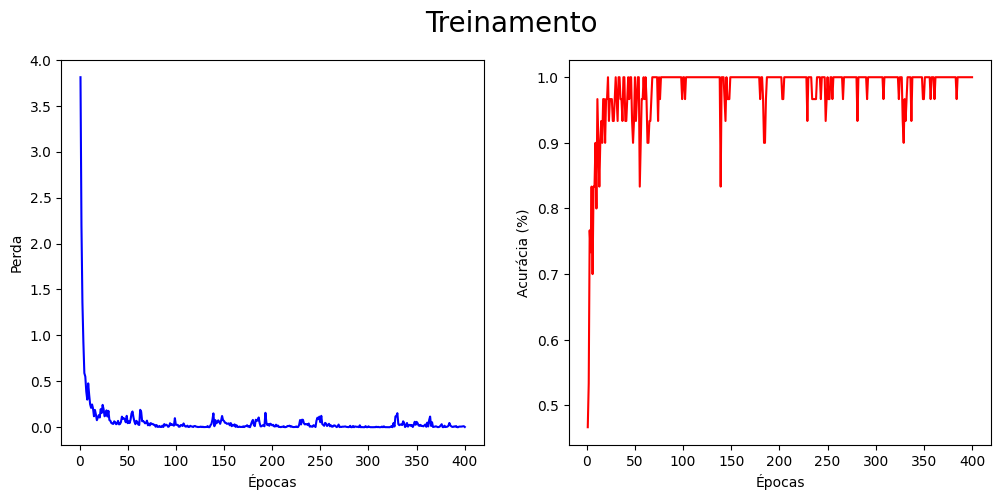

In [12]:
epochs = range(1, num_epoch + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b-')
plt.xlabel('Épocas')
plt.ylabel('Perda')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'r-')
plt.xlabel('Épocas')
plt.ylabel('Acurácia (%)')

plt.suptitle("Treinamento", fontsize = 20)

In [13]:
model.eval()
    
with torch.no_grad():
        
    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        acc = accuracy_score(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy())
        
print(f"Acurácia: {acc:.2f}")

Acurácia: 0.97


# <center>Métricas de avaliação</center>

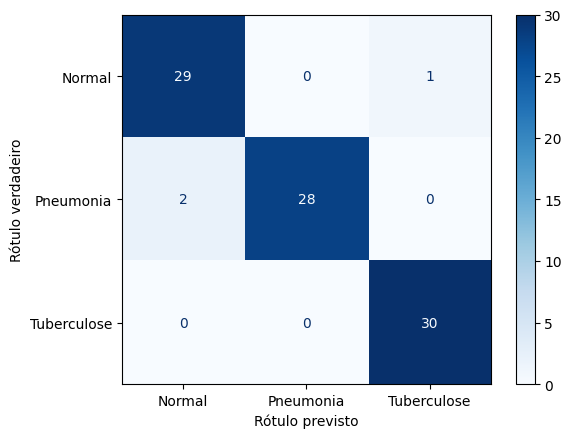

In [14]:
cm = confusion_matrix(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Pneumonia', 'Tuberculose'])
disp.plot(cmap=plt.cm.Blues)

plt.xlabel('Rótulo previsto')
plt.ylabel('Rótulo verdadeiro')
plt.show()

In [15]:
print(classification_report(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy(), target_names=['Normal', 'Pneumonia', 'Tuberculose']))

              precision    recall  f1-score   support

      Normal       0.94      0.97      0.95        30
   Pneumonia       1.00      0.93      0.97        30
 Tuberculose       0.97      1.00      0.98        30

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



In [16]:
precision = precision_score(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy(), average='weighted')
print(f"Precisão: {precision:.2f}")

Precisão: 0.97


In [17]:
recall = recall_score(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy(), average='weighted')
print(f"Recall: {recall:.2f}")

Recall: 0.97


In [18]:
f1 = f1_score(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy(), average='weighted')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.97
